In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data preparation and exploration

In [210]:
df_test = pd.read_csv('./data/test.csv')
df_train = pd.read_csv('./data/train.csv')

In [9]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [196]:
X_test = df_test.copy()
X_train = df_train.drop(['Survived', 'Name'], axis=1).copy()
y_train = df_train['Survived'][:, np.newaxis]

In [28]:
X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
df_train.groupby(['Survived']).count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


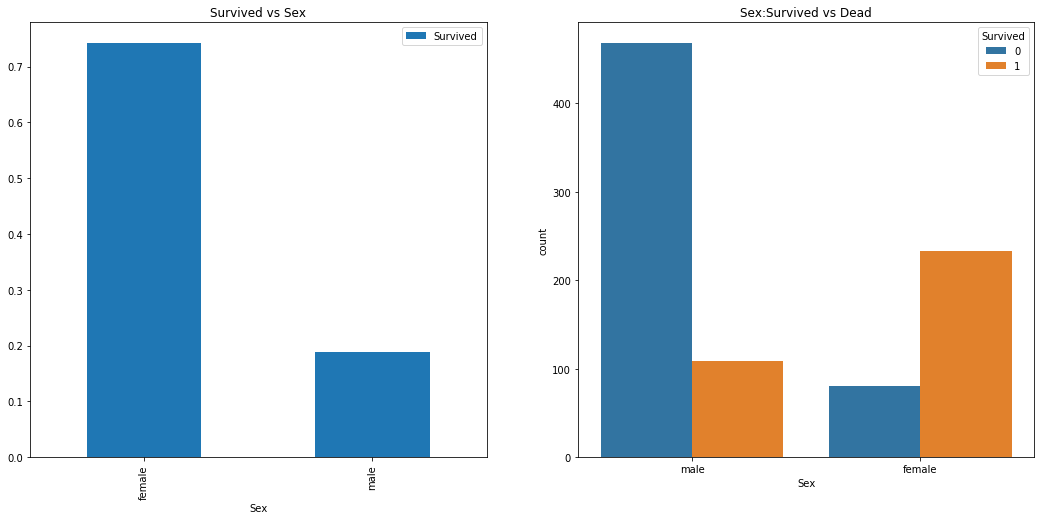

In [37]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [62]:
survived_passengers = df_train[df_train['Survived'] == 1]
dead_passenger = df_train[df_train['Survived'] == 0]
survived_men = survived_passengers[survived_passengers['Sex'] == 'male']
dead_men = dead_passenger[dead_passenger['Sex'] == 'male']
survived_women = survived_passengers[survived_passengers['Sex'] == 'female']
dead_women = dead_passenger[dead_passenger['Sex'] == 'female']
survived_percentage_of_men = len(survived_men) / (len(survived_men) + len(dead_men)) * 100
survived_percentage_of_women = len(survived_women) / (len(survived_women) + len(dead_women)) * 100

print('Total count of men on ship {}'.format(len(survived_men) + len(dead_men)))
print('Percentage of survived men {}'.format(survived_percentage_of_men))
print('Total count of men on ship {}'.format(len(survived_women) + len(dead_women)))
print('Percentage of survived women {}'.format(survived_percentage_of_women))

Total count of men on ship 577
Percentage of survived men 18.890814558058924
Total count of men on ship 314
Percentage of survived women 74.20382165605095


In [67]:
pd.crosstab(df_train.Pclass,df_train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


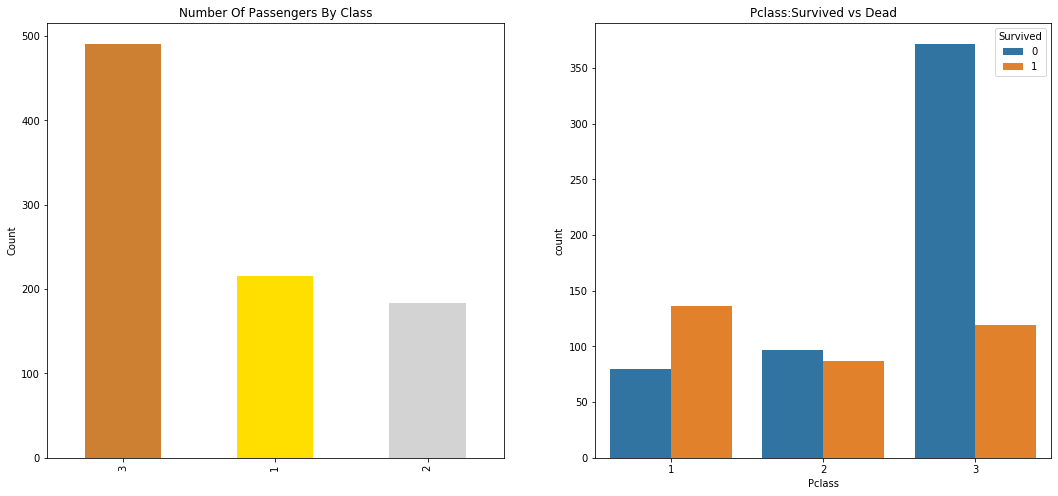

In [88]:
f,ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Class')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [92]:
pd.crosstab([df_train.Sex,df_train.Survived],df_train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

### Extract names to fill NaN values

In [211]:
df_train['Presents']=0
for i in df_train:
    df_train['Presents'] = df_train.Name.str.extract('([A-Za-z]+)\.')

In [137]:
pd.crosstab(df_train.Presents,df_train.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


### Replace salutations

In [212]:
df_train['Presents'].replace(
    ['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],
    ['Miss', 'Miss', 'Miss', 'Other', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'],
    inplace=True
)

In [213]:
pd.crosstab(df_train.Presents,df_train.Sex).T.style.background_gradient(cmap='summer_r')

Presents,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,0,127,1
male,40,0,522,0,15


In [214]:
df_train.groupby(['Presents'])['Age'].mean()

Presents
Master     4.574167
Miss      21.860000
Mr        32.601737
Mrs       35.981818
Other     44.333333
Name: Age, dtype: float64

In [221]:
df_train[df_train['Age'].isnull()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Presents
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss


In [222]:
df_train['Age'] = df_train.groupby('Presents')['Age'].transform(lambda x: x.fillna(x.mean()))

In [235]:
df_train.groupby(['Presents']).describe()['Age']

,count,mean,std,min,25%,50%,75%,max
Presents,,,,,,,,
Master,40.0,4.574167,3.429216,0.42,1.75,4.000000,7.25,12.0
Miss,186.0,21.860000,11.512845,0.75,16.25,21.860000,26.75,63.0
Mr,522.0,32.601737,11.288813,11.00,25.00,32.601737,36.00,80.0
Mrs,127.0,35.981818,10.594235,14.00,29.00,35.981818,42.50,63.0
Other,16.0,44.333333,11.682846,23.00,36.50,46.666667,54.00,60.0


In [237]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Presents         0
dtype: int64

In [240]:
df_train.Age = df_train.Age.round()

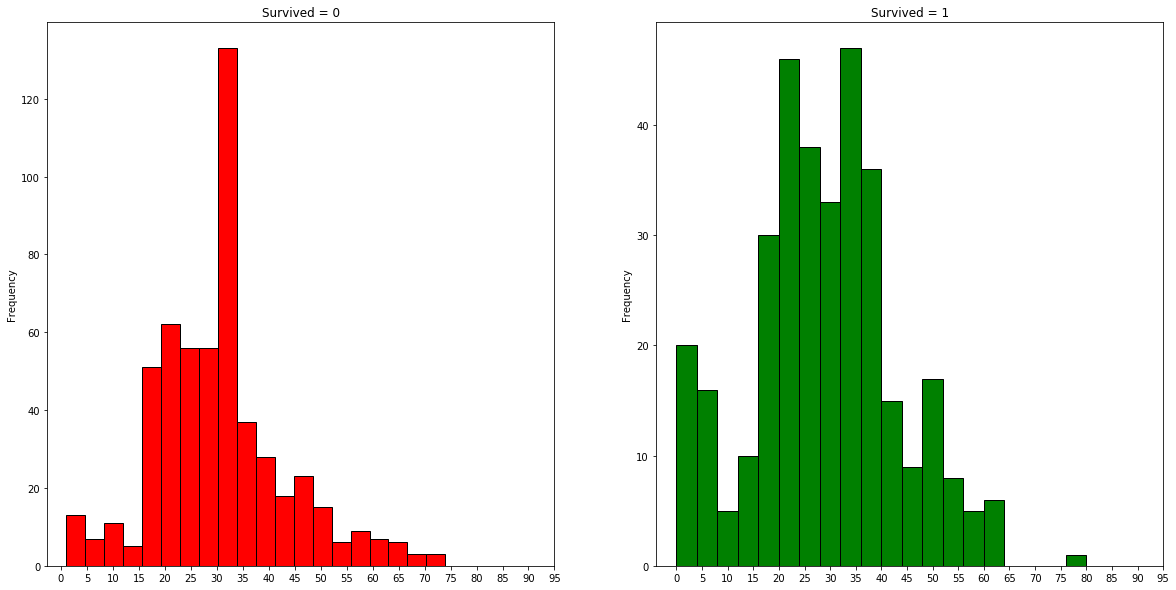

In [245]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
df_train[df_train['Survived'] == 0].Age.plot.hist(ax = ax[0], bins = 20, 
                                                  edgecolor = 'black', color = 'red')
ax[0].set_title('Survived = 0')
ranges = list(range(0,100,5))
ax[0].set_xticks(ranges)
df_train[df_train['Survived'] == 1].Age.plot.hist(ax = ax[1], color = 'green', 
                                                  bins = 20, edgecolor = 'black')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(ranges)
plt.show()